<a href="https://colab.research.google.com/github/suajeong52/heaveMPM/blob/main/0627_TEST_MFK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install smt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 256.1/256.1 kB 9.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for smt: filename=smt-1.3.0-cp310-cp310-linux_x86_64.whl size=654266 sha256=4d1a946ec90e410a372f075ad6399801b4acb38b843828002947ed005dc665df
  Stored in directory: /root/.cache/pip/wheels/3b/d3/c7/5455cf3d853cb05d5b2e50ffc8085af8f2a31e15b4718a3bd9
  Created wheel for pyDOE2: filename=pyDOE2-1.3.0-py3-none-any.whl size=25521 sha256=328d560cb0aaa1f3a7d7d56fae1caf05086cf2de3c97579ac43ef0ad7555647e
  Stored in directory: /root/.cache/pip/wheels/46/1f/29/6fda5c72f950841e39147ae603780ee913a62f977b4ad47ee4
Successfully built smt pyDOE2


In [ ]:
import numpy as np
from smt.sampling_methods import LHS
from smt.utils import compute_rms_error
from smt.applications import MFK
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
xH = pd.read_excel('xt_H.xlsx', usecols=[1]).values
xL = pd.read_excel('xt_L.xlsx', usecols=[1]).values

yH = pd.read_excel('mpmH.xlsx', usecols=[1]).values
yL = pd.read_excel('mpmL.xlsx', usecols=[1]).values


In [ ]:
# Sample the test points using LHS
xlimits = np.array([[19.00, 20.00]])
sampling = LHS(xlimits=xlimits, criterion='ese', random_state=1)

test_num = 30
X_test = sampling(test_num)

In [ ]:
print(X_test)

[[19.11007775]
 [19.69335815]
 [19.82921297]
 [19.16974462]
 [19.90130183]
 [19.52234892]
 [19.46757959]
 [19.27989225]
 [19.86315356]
 [19.60467956]
 [19.86950147]
 [19.46260391]
 [19.34730648]
 [19.74378081]
 [19.78974409]
 [19.01390073]
 [19.06667048]
 [19.31796056]
 [19.93899435]
 [19.54724349]
 [19.40681507]
 [19.38950732]
 [19.63993672]
 [19.1382252 ]
 [19.99593808]
 [19.58528966]
 [19.73227539]
 [19.20620867]
 [19.05734415]
 [19.24485202]]


In [ ]:
xH.shape[1]

1

In [ ]:
K = xH.shape[1] * [1.0]

print(K)

[1.0]


In [ ]:
# Fit the MFK model
sm = MFK(theta0=xH.shape[1] * [1.0])

In [ ]:
sm.set_training_values(xH, yH)
# high-fidelity dataset without name
sm.set_training_values(xL, yL, name=0)

In [ ]:
sm.train()

___________________________________________________________________________
   
                                    MFK
___________________________________________________________________________
   
 Problem size
   
      # training points.        : 7
   
___________________________________________________________________________
   
 Training
   
   Training ...
   Training - done. Time (sec):  0.0998573


In [ ]:



# Predict on the test points
y_pred= sm.predict_values(X_test)
mse = sm.predict_variances(X_test)
derivs = sm.predict_derivatives(X_test, kx=0)

___________________________________________________________________________
   
 Evaluation
   
      # eval points. : 30
   
   Predicting ...
   Predicting - done. Time (sec):  0.0034955
   
   Prediction time/pt. (sec) :  0.0001165
   
___________________________________________________________________________
   
 Evaluation
   
      # eval points. : 30
   
   Predicting ...
   Predicting - done. Time (sec):  0.0006218
   
   Prediction time/pt. (sec) :  0.0000207
   


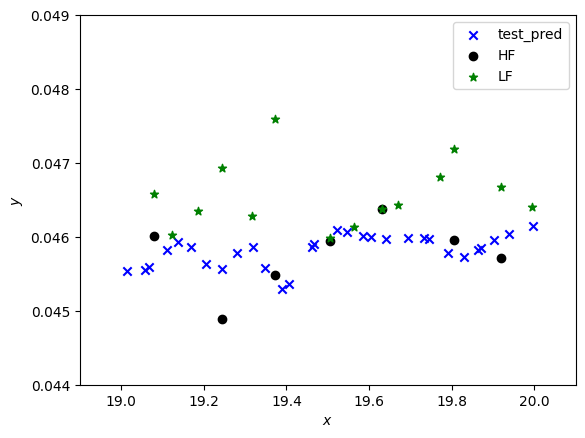

In [ ]:
plt.figure()

plt.scatter(X_test, y_pred, marker="x",color="b", label="test_pred")
plt.scatter(xH, yH, marker="o", color="k", label="HF")
plt.scatter(xL, yL, marker="*", color="g", label="LF")

plt.xlim(18.9, 20.1)
plt.ylim(0.044, 0.049)
plt.legend(loc=0)
plt.xlabel(r"$x$")
plt.ylabel(r"$y$")

plt.show()

In [ ]:
print(X_test)
print(y_pred)

[[19.11007775]
 [19.69335815]
 [19.82921297]
 [19.16974462]
 [19.90130183]
 [19.52234892]
 [19.46757959]
 [19.27989225]
 [19.86315356]
 [19.60467956]
 [19.86950147]
 [19.46260391]
 [19.34730648]
 [19.74378081]
 [19.78974409]
 [19.01390073]
 [19.06667048]
 [19.31796056]
 [19.93899435]
 [19.54724349]
 [19.40681507]
 [19.38950732]
 [19.63993672]
 [19.1382252 ]
 [19.99593808]
 [19.58528966]
 [19.73227539]
 [19.20620867]
 [19.05734415]
 [19.24485202]]
[[0.04582627]
 [0.04597866]
 [0.04572396]
 [0.04586873]
 [0.04595329]
 [0.04609013]
 [0.04590088]
 [0.04578565]
 [0.04582169]
 [0.04599181]
 [0.04584761]
 [0.04586132]
 [0.04557435]
 [0.04596461]
 [0.0457794 ]
 [0.0455397 ]
 [0.04558666]
 [0.04585743]
 [0.04604233]
 [0.04607157]
 [0.04536589]
 [0.04529807]
 [0.04597604]
 [0.04592432]
 [0.04614633]
 [0.04601601]
 [0.04597938]
 [0.0456389 ]
 [0.04555731]
 [0.04555951]]


In [ ]:
#df = pd.DataFrame(X_test)
#df.to_excel('xtest.xlsx', sheet_name='xt_L_sheet')

In [ ]:
y_realL = pd.read_excel('mpmTEST.xlsx', usecols=[1]).values
print(y_realL)

[[0.04617302]
 [0.04648197]
 [0.04721377]
 [0.04614955]
 [0.04668821]
 [0.04609639]
 [0.04541553]
 [0.04686053]
 [0.04704948]
 [0.0463176 ]
 [0.04692591]
 [0.04533219]
 [0.04588281]
 [0.04703477]
 [0.04697479]
 [0.04829235]
 [0.04674321]
 [0.04641669]
 [0.04653111]
 [0.04605485]
 [0.04519979]
 [0.04521778]
 [0.04630093]
 [0.04614732]
 [0.04633602]
 [0.04625257]
 [0.0463778 ]
 [0.04632535]
 [0.04675378]
 [0.04682784]]


In [ ]:
y_realH = pd.read_excel('mpmT_H30.xlsx', usecols=[1]).values
print(y_realH)

[[0.04641416]
 [0.04669476]
 [0.04592334]
 [0.04618414]
 [0.04586465]
 [0.04596061]
 [0.04594042]
 [0.04491276]
 [0.04578364]
 [0.0454285 ]
 [0.04586987]
 [0.04598193]
 [0.04554791]
 [0.04632308]
 [0.04613821]
 [0.04580099]
 [0.04611639]
 [0.04495745]
 [0.04559603]
 [0.04610012]
 [0.04572014]
 [0.04571412]
 [0.04640232]
 [0.04660687]
 [0.04526989]
 [0.0459685 ]
 [0.04653284]
 [0.04561209]
 [0.04586792]
 [0.04492106]]


In [ ]:
#mesh low로 구했을때의 정확도? 비율?
yP = y_pred/y_realL
print(yP)

[[0.99249004]
 [0.98917189]
 [0.96844554]
 [0.9939152 ]
 [0.98425897]
 [0.99986404]
 [1.0106869 ]
 [0.97706213]
 [0.97390423]
 [0.99296613]
 [0.97702139]
 [1.01167227]
 [0.99327734]
 [0.9772474 ]
 [0.97455238]
 [0.9430003 ]
 [0.97525746]
 [0.98795135]
 [0.98949562]
 [1.00036303]
 [1.00367488]
 [1.00177582]
 [0.99298315]
 [0.99516763]
 [0.9959062 ]
 [0.99488536]
 [0.99140912]
 [0.98518198]
 [0.97440918]
 [0.97291513]]


In [ ]:
yP_H = y_pred/y_realH
print(yP_H)

[[0.9873338 ]
 [0.98466414]
 [0.99565837]
 [0.99317081]
 [1.00193267]
 [1.00281789]
 [0.99913929]
 [1.01943515]
 [1.00083102]
 [1.01239994]
 [0.99951481]
 [0.99737702]
 [1.00058062]
 [0.99226146]
 [0.9922232 ]
 [0.99429501]
 [0.98851328]
 [1.02001854]
 [1.0097882 ]
 [0.99938072]
 [0.99225171]
 [0.99089903]
 [0.99081343]
 [0.98535529]
 [1.01936031]
 [1.0010334 ]
 [0.9881061 ]
 [1.00058783]
 [0.9932281 ]
 [1.01421277]]


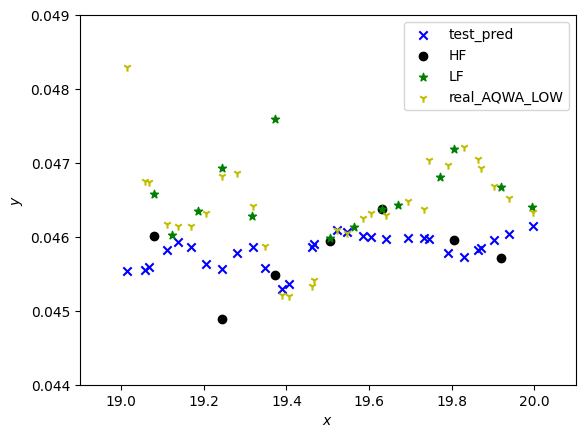

In [ ]:
plt.figure()

plt.scatter(X_test, y_pred, marker="x",color="b", label="test_pred")
plt.scatter(xH, yH, marker="o", color="k", label="HF")
plt.scatter(xL, yL, marker="*", color="g", label="LF")
plt.scatter(X_test, y_realL, marker="1", color="y", label="real_AQWA_LOW")

plt.xlim(18.9, 20.1)
plt.ylim(0.044, 0.049)
plt.legend(loc=0)
plt.xlabel(r"$x$")
plt.ylabel(r"$y$")

plt.show()

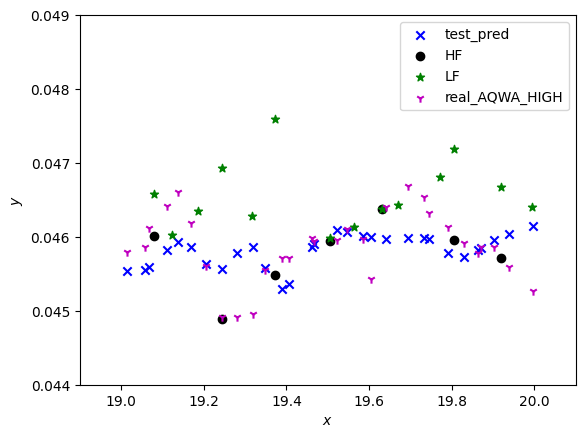

In [ ]:
plt.figure()

plt.scatter(X_test, y_pred, marker="x",color="b", label="test_pred")
plt.scatter(xH, yH, marker="o", color="k", label="HF")
plt.scatter(xL, yL, marker="*", color="g", label="LF")
plt.scatter(X_test, y_realH, marker="1", color="m", label="real_AQWA_HIGH")

plt.xlim(18.9, 20.1)
plt.ylim(0.044, 0.049)
plt.legend(loc=0)
plt.xlabel(r"$x$")
plt.ylabel(r"$y$")

plt.show()

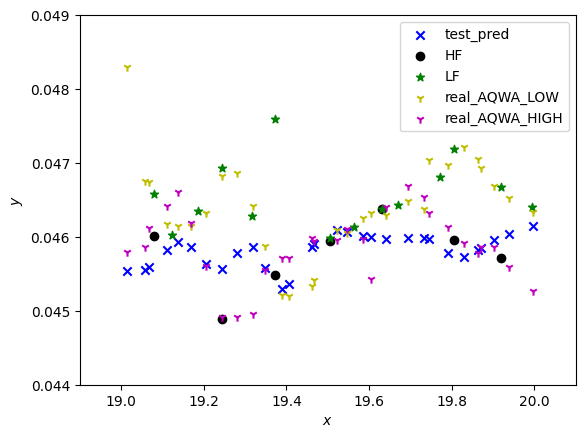

In [ ]:
plt.figure()

plt.scatter(X_test, y_pred, marker="x",color="b", label="test_pred")
plt.scatter(xH, yH, marker="o", color="k", label="HF")
plt.scatter(xL, yL, marker="*", color="g", label="LF")
plt.scatter(X_test, y_realL, marker="1", color="y", label="real_AQWA_LOW")
plt.scatter(X_test, y_realH, marker="1", color="m", label="real_AQWA_HIGH")

plt.xlim(18.9, 20.1)
plt.ylim(0.044, 0.049)
plt.legend(loc=0)
plt.xlabel(r"$x$")
plt.ylabel(r"$y$")

plt.show()